In [1]:
import pandas as pd
import numpy as np

In [2]:
import torch
from torch import nn
from torch.utils.data import Dataset, DataLoader
from torch.autograd import Variable
import torch.nn.functional as func

In [3]:
import tensorflow as tf

INFO:tensorflow:Enabling eager execution
INFO:tensorflow:Enabling v2 tensorshape
INFO:tensorflow:Enabling resource variables
INFO:tensorflow:Enabling tensor equality
INFO:tensorflow:Enabling control flow v2


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.utils import class_weight
from sklearn.metrics import accuracy_score

In [5]:
import matplotlib.pyplot as plt

# Data location

In [6]:
data_path = "data/clean_data.csv"

# Set seed

In [7]:
SEED = 42

# Load data

In [8]:
df = pd.read_csv(data_path)

In [9]:
df.shape

(11627, 39)

In [10]:
df.columns

Index(['RANDID', 'SEX', 'TOTCHOL', 'AGE', 'SYSBP', 'DIABP', 'CURSMOKE',
       'CIGPDAY', 'BMI', 'DIABETES', 'BPMEDS', 'HEARTRTE', 'GLUCOSE', 'educ',
       'PREVCHD', 'PREVAP', 'PREVMI', 'PREVSTRK', 'PREVHYP', 'TIME', 'PERIOD',
       'HDLC', 'LDLC', 'DEATH', 'ANGINA', 'HOSPMI', 'MI_FCHD', 'ANYCHD',
       'STROKE', 'CVD', 'HYPERTEN', 'TIMEAP', 'TIMEMI', 'TIMEMIFC', 'TIMECHD',
       'TIMESTRK', 'TIMECVD', 'TIMEDTH', 'TIMEHYP'],
      dtype='object')

In [11]:
df.iloc[:, 1: 23].columns

Index(['SEX', 'TOTCHOL', 'AGE', 'SYSBP', 'DIABP', 'CURSMOKE', 'CIGPDAY', 'BMI',
       'DIABETES', 'BPMEDS', 'HEARTRTE', 'GLUCOSE', 'educ', 'PREVCHD',
       'PREVAP', 'PREVMI', 'PREVSTRK', 'PREVHYP', 'TIME', 'PERIOD', 'HDLC',
       'LDLC'],
      dtype='object')

In [12]:
df.iloc[:, 23: 31].columns

Index(['DEATH', 'ANGINA', 'HOSPMI', 'MI_FCHD', 'ANYCHD', 'STROKE', 'CVD',
       'HYPERTEN'],
      dtype='object')

In [13]:
print(df.iloc[:, 1: 23].shape[1], df.iloc[:, 23: 31].shape[1])

22 8


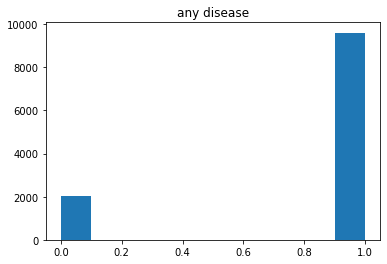

In [14]:
data = np.loadtxt(data_path, delimiter=",", dtype=np.float32, skiprows=1)
amax_label = np.amax(data[:, 23:31], axis=1)
hist,bins = np.histogram(amax_label) 

plt.hist(amax_label, bins = bins) 
plt.title("any disease") 
plt.show()

In [15]:
df

,RANDID,SEX,TOTCHOL,AGE,SYSBP,DIABP,CURSMOKE,CIGPDAY,BMI,DIABETES,...,CVD,HYPERTEN,TIMEAP,TIMEMI,TIMEMIFC,TIMECHD,TIMESTRK,TIMECVD,TIMEDTH,TIMEHYP
0,2448.0,1.0,195.0,39.0,106.0,70.0,0.0,0.0,26.970,0.0,...,1.0,0.0,8766.0,6438.0,6438.0,6438.0,8766.0,6438.0,8766.0,8766.0
1,2448.0,1.0,209.0,52.0,121.0,66.0,0.0,0.0,27.794,0.0,...,1.0,0.0,8766.0,6438.0,6438.0,6438.0,8766.0,6438.0,8766.0,8766.0
2,6238.0,0.0,250.0,46.0,121.0,81.0,0.0,0.0,28.730,0.0,...,0.0,0.0,8766.0,8766.0,8766.0,8766.0,8766.0,8766.0,8766.0,8766.0
3,6238.0,0.0,260.0,52.0,105.0,70.0,0.0,0.0,29.430,0.0,...,0.0,0.0,8766.0,8766.0,8766.0,8766.0,8766.0,8766.0,8766.0,8766.0
4,6238.0,0.0,237.0,58.0,108.0,66.0,0.0,0.0,28.500,0.0,...,0.0,0.0,8766.0,8766.0,8766.0,8766.0,8766.0,8766.0,8766.0,8766.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11622,9998212.0,1.0,173.0,46.0,126.0,82.0,0.0,0.0,19.170,0.0,...,0.0,1.0,8766.0,8766.0,8766.0,8766.0,8766.0,8766.0,8766.0,0.0
11623,9998212.0,1.0,153.0,52.0,143.0,89.0,0.0,0.0,25.740,0.0,...,0.0,1.0,8766.0,8766.0,8766.0,8766.0,8766.0,8766.0,8766.0,0.0
11624,9999312.0,0.0,196.0,39.0,133.0,86.0,1.0,30.0,20.910,0.0,...,0.0,1.0,8766.0,8766.0,8766.0,8766.0,8766.0,8766.0,8766.0,4201.0
11625,9999312.0,0.0,240.0,46.0,138.0,79.0,1.0,20.0,26.390,0.0,...,0.0,1.0,8766.0,8766.0,8766.0,8766.0,8766.0,8766.0,8766.0,4201.0


# DataSet

In [16]:
class HeatDeseaseDataset(Dataset): 
    
    def __init__(self, path, any_disease=False):
        
        self.data = np.loadtxt(path, delimiter=",", dtype=np.float32, skiprows=1)
        self.x = torch.from_numpy(self.data[:, 1:23])
        if any_disease:
            self.y = torch.from_numpy(np.amax(self.data[:, 23:31], axis=1))
        else:
            #self.y = torch.from_numpy(self.data[:, 30:31])
            #get the label into 2 classes 
            self.y = torch.from_numpy(pd.get_dummies(self.data[:, 30:31].flatten()).to_numpy(dtype=np.float32))
        
        self.len = len(self.data)

    def __len__(self):
        return self.len
    
    def __getitem__(self, idx):
        return self.x[idx], self.y[idx]#, self.original[idx]

# DataLoader

In [17]:
def create_dataloaders(dataset, batch_size):
    lengths = [round(len(dataset) * split) for split in [TRAIN_SPLIT, VALIDATION_SPLIT, TEST_SPLIT]]
    
    train_dataset, val_dataset, test_dataset = torch.utils.data.random_split(dataset, lengths=lengths, generator=torch.Generator().manual_seed(SEED))
    
    train_dataloader = torch.utils.data.DataLoader(
        train_dataset,
        batch_size=batch_size,
        shuffle=True,
        num_workers=4,
        prefetch_factor=2,
        persistent_workers=False,
        pin_memory=True
    )

    val_dataloader = torch.utils.data.DataLoader(
        val_dataset,
        batch_size=batch_size,
        shuffle=True,
        num_workers=4,
        prefetch_factor=2,
        persistent_workers=False,
        pin_memory=True
    )

    test_dataloader = torch.utils.data.DataLoader(
        test_dataset,
        batch_size=1,
        shuffle=True,
        num_workers=4,
        prefetch_factor=2,
        persistent_workers=False,
        pin_memory=True
    )
    
    print(f'Total dataset: {len(train_dataloader) + len(val_dataloader) + len(test_dataloader)}, '
            f'train dataset: {len(train_dataloader)}, val dataset: {len(val_dataloader)}, test_dataset: {len(test_dataloader)}')
    return train_dataloader, val_dataloader, test_dataloader

# Accuracy

In [18]:
def accuracy_multi_prediction(pred, label):
    res = 0
    nb_prediction = pred.shape[1]

    for i in range(nb_prediction):
        if pred[0][i].item() == label[0][i].item():
            res += 1
    return res / nb_prediction

In [19]:
def accuracy(pred, label):
    #print(pred, label)
    if pred == label:
            return 1
    return 0

# Trainer

In [20]:
class Trainer:
    def __init__(self, model, class_weight, loss='dl', lr=0.5):
        possible_loss = {'dl' : DiceLoss(), 'nllloss' : nn.NLLLoss(weight=class_weights,reduction='mean'),
                         'cross' : nn.CrossEntropyLoss(weight=class_weights), 'mse' : nn.MSELoss(reduction='mean'),
                         'BCEloss' : nn.BCELoss(), 'BCElogits' : nn.BCEWithLogitsLoss(weight=class_weights)}
        
        self.model = model
        
        self.criterion = possible_loss[loss]
        self.optimizer = torch.optim.SGD(model.parameters(), lr=lr)
        self.scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(self.optimizer, mode='max', factor=0.1, patience=2, cooldown=2)
        
        self.history = {'lr': [], 'loss': [], 'val_loss': []}
        self.max_val_acc = float('-inf')
        
    def fit(self, train_dataloader, val_dataloader, nb_epochs):
        for epoch in range(nb_epochs):
            print(f'Epoch {epoch + 1} / {nb_epochs}')
            train_loss = val_loss = train_acc = val_acc = 0.0
            
            self.model.train()
            pbar = tf.keras.utils.Progbar(target=len(train_dataloader))
            
            for i, batch in enumerate(train_dataloader):
                inputs, labels = batch

                # Clear gradients w.r.t. parameters
                self.optimizer.zero_grad()
                
                # Forward pass to get output/logits
                output = self.model(inputs)

                # Calculate Loss: softmax --> cross entropy loss
                #print(output.shape, labels.shape)
                #print(output, labels)
                loss = self.criterion(output, labels)
                train_loss += loss
                #print(np.argmax(output.detach().numpy()[0]), np.argmax(labels.detach().numpy()[0]))
                train_acc += 1 if np.argmax(labels.detach().numpy()[0]) == np.argmax(output.detach().numpy()[0]) else 0

                # Getting gradients w.r.t. parameters
                loss.backward()

                pbar.update(i + 1, values=
                            [
                                ("loss", train_loss.item()/(i + 1)),
                                ("acc", train_acc/(i + 1)),
                                ("lr", self.scheduler.optimizer.param_groups[0]['lr'])
                            ])
                
                # Updating parameters
                self.optimizer.step()
                
            
            print('Validation')
            
            self.model.eval()
            pbar = tf.keras.utils.Progbar(target=len(val_dataloader))
            
            with torch.no_grad():
                for i, batch in enumerate(val_dataloader):
                    inputs, labels = batch
                    output = self.model(inputs)
                    
                    val_loss += loss
                    val_acc += 1 if np.argmax(labels.detach().numpy()[0]) == np.argmax(output.detach().numpy()[0]) else 0
                    
                    pbar.update(i + 1, values=
                            [
                                ("loss", val_loss.item()/(i + 1)),
                                ("acc", val_acc/(i + 1)),
                                ("lr", self.scheduler.optimizer.param_groups[0]['lr'])
                            ])
                    
            train_loss = train_loss / len(train_dataloader)
            train_acc = train_acc / len(train_dataloader)
            
            val_loss = val_loss / len(val_dataloader)
            val_acc = val_acc / len(val_dataloader)
            
            lr = self.scheduler.optimizer.param_groups[0]['lr']
            self.scheduler.step(val_loss)
            
            if val_acc > self.max_val_acc:
                print(f'Model saved. Acc updated: {self.max_val_acc:.3f} -> {val_acc:.3f}')
                self.max_val_acc = val_acc
                torch.save(self.model.state_dict(), f'regression_logistice_{val_acc}.pt')
            
    def evaluate(self, test_dataloader, accuracy_function):
        correct = total_loss = total = 0.0
        #iterator = 0
        
        with torch.no_grad():       
            # Iterate through test dataset
            for i, (inputs, labels) in enumerate(test_dataloader):

                pred = self.model(inputs)

                loss = self.criterion(pred, labels)
                total_loss += loss
                    
                # Total correct predictions
                correct += 1 if np.argmax(labels.detach().numpy()[0]) == np.argmax(pred.detach().numpy()[0]) else 0
                #iterator += 1

            total_accuracy = 100 * correct / len(test_dataloader)

            # Print Loss
            print('Iteration: {}. Loss: {}. Accuracy: {}. total loss: {}.'.format(len(test_dataloader), loss.item(), total_accuracy, total_loss))
     

# Loss

In [21]:
class DiceLoss(nn.Module):
    def __init__(self, weight=None, size_average=True):
        super(DiceLoss, self).__init__()

    def forward(self, inputs, targets, smooth=1):
        
        #comment out if your model contains a sigmoid or equivalent activation layer
        inputs = torch.sigmoid(inputs)       
        
        #flatten label and prediction tensors
        inputs = inputs.view(-1)
        targets = targets.view(-1)
        
        intersection = (inputs * targets).sum()                            
        dice = (2.*intersection + smooth)/(inputs.sum() + targets.sum() + smooth)  
        
        return 1 - dice

# The logistic regession function

In [22]:
class LogisticRegression(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LogisticRegression, self).__init__()
        self.linear = nn.Linear(input_dim, output_dim)
        #self.final_activation = func.sigmoid()

    def forward(self, x):
        out = self.linear(x)
        #out = func.sigmoid(out)
        return out

# Prepare the data

In [23]:
TEST_SPLIT = 0.2
VALIDATION_SPLIT = 0.21
TRAIN_SPLIT = 1 - TEST_SPLIT - VALIDATION_SPLIT

In [24]:
batch_size = 1

dataset = HeatDeseaseDataset(data_path, any_disease=False)
train_dataloader, val_dataloader, test_dataloader = create_dataloaders(dataset, batch_size)

Total dataset: 11627, train dataset: 6860, val dataset: 2442, test_dataset: 2325


# Data verification

In [25]:
participant = next(iter(train_dataloader))
print('input ==>\n', participant[0])
print('label ==>\n', participant[1])

input ==>
 tensor([[  0.0000, 192.0000,  37.0000, 112.0000,  67.0000,   0.0000,   0.0000,
          24.6100,   0.0000,   0.0000,  80.0000,  58.0000,   1.0000,   0.0000,
           0.0000,   0.0000,   0.0000,   0.0000,   0.0000,   1.0000,  46.0000,
         186.0000]])
label ==>
 tensor([[0., 1.]])


# Train

In [26]:
model = LogisticRegression(22,2)

In [27]:
zero = 0.
one = 0.
for class1, class2 in dataset.y.numpy():
    if class1 == 1.:
        zero += 1.
    else:
        one += 1.
print(zero, one, dataset.y.shape[0])

2985.0 8642.0 11627


In [28]:
class_weights=class_weight.compute_class_weight(class_weight='balanced', classes=np.unique(dataset.y), y=dataset.y.numpy().flatten())
class_weights=torch.tensor([zero / dataset.y.shape[0], one /  dataset.y.shape[0]],dtype=torch.float32)

In [29]:
class_weights

tensor([0.2567, 0.7433])

In [30]:
trainer = Trainer(model, class_weights, loss='BCElogits', lr=0.05)

In [31]:
trainer.fit(
    train_dataloader,
    val_dataloader,
    nb_epochs=10
) 

Epoch 1 / 10
6860/6860 [==============================] - 9s 1ms/step - loss: 9908.6909 - acc: 0.6497 - lr: 0.0500
Validation
2442/2442 [==============================] - 2s 887us/step - loss: 0.0000e+00 - acc: 0.3735 - lr: 0.0500
Model saved. Acc updated: -inf -> 0.372
Epoch 2 / 10
6860/6860 [==============================] - 9s 1ms/step - loss: 10550.3687 - acc: 0.6664 - lr: 0.0500
Validation
2442/2442 [==============================] - 2s 890us/step - loss: 0.0000e+00 - acc: 0.7505 - lr: 0.0500
Model saved. Acc updated: 0.372 -> 0.755
Epoch 3 / 10
6860/6860 [==============================] - 9s 1ms/step - loss: 9848.8962 - acc: 0.6777 - lr: 0.0500
Validation
2442/2442 [==============================] - 2s 962us/step - loss: 0.0000e+00 - acc: 0.4233 - lr: 0.0500
Epoch 4 / 10
6860/6860 [==============================] - 9s 1ms/step - loss: 10242.7936 - acc: 0.6733 - lr: 0.0500
Validation
2442/2442 [==============================] - 2s 901us/step - loss: 0.0000e+00 - acc: 0.7445 - lr: 

In [32]:
df.iloc[:, 1: 23].columns

Index(['SEX', 'TOTCHOL', 'AGE', 'SYSBP', 'DIABP', 'CURSMOKE', 'CIGPDAY', 'BMI',
       'DIABETES', 'BPMEDS', 'HEARTRTE', 'GLUCOSE', 'educ', 'PREVCHD',
       'PREVAP', 'PREVMI', 'PREVSTRK', 'PREVHYP', 'TIME', 'PERIOD', 'HDLC',
       'LDLC'],
      dtype='object')

In [33]:
model.linear.weight

Parameter containing:
tensor([[ 1.9000e+00,  6.2647e+00,  1.7459e+01, -2.1078e+02, -2.5681e+01,
          3.4937e+00,  3.4989e+01,  1.1576e+01, -1.2915e+00, -2.8857e+00,
          6.4448e+01,  2.5412e+01,  1.1000e+01, -8.6378e-01, -7.0869e-01,
         -4.5260e-01, -4.5579e-01, -1.6092e+01, -5.7404e-01,  2.2192e+00,
          1.1253e+02,  6.1550e+01],
        [-5.9665e+00, -1.8218e+01, -5.0149e+01,  6.0926e+02,  7.5550e+01,
         -9.6868e+00, -9.9048e+01, -3.2465e+01,  3.2555e+00,  8.0814e+00,
         -1.8165e+02, -7.8080e+01, -3.2287e+01,  2.7813e+00,  2.1921e+00,
          1.6061e+00,  9.8058e-01,  4.5949e+01,  1.0751e+00, -6.4736e+00,
         -3.1648e+02, -1.8121e+02]], requires_grad=True)

# Test

torch.load(f'regression_logistice_0.5642915642915642.pt')

In [34]:
trainer.evaluate(test_dataloader, accuracy)

Iteration: 2325. Loss: 0.0. Accuracy: 78.9247311827957. total loss: 1588913.5.


**Test on one participant**

    for i, (inputs, labels) in enumerate(test_dataloader):
        pred = model(inputs)
        
        if i ==1:
            break
    pred, labels

In [35]:
print(len(test_dataloader))

2325


In [36]:
# Confusion matrix 
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

def prediction_analyse(dataloader):
    all_predictions = np.array([])
    all_labels = np.array([])
    for i, (inputs, labels) in enumerate(dataloader):
        pred = model(inputs)
        print("pred", pred)
        pred = np.where( pred[0].detach().numpy() < 0., 0, 1)
        print("np where", pred)
        print("labels", labels)
        pred = np.argmax(pred)
        label = np.argmax(labels[0].detach().numpy())
        print("argmax pred", pred)
        print("argmax label", label, "\n\n\n")
        all_predictions = np.append(all_predictions, pred)
        all_labels = np.append(all_labels, label)

    cm = confusion_matrix(all_labels, all_predictions)
    #
    #print(cm)

    display = ConfusionMatrixDisplay(confusion_matrix=cm)#, display_labels=clf.classes_)
    display.plot()
    plt.show()

    TP = cm[1,1] # true positive 
    TN = cm[0,0] # true negatives
    FP = cm[0,1] # false positives
    FN = cm[1,0] # false negatif

    sensitivity = TP / (TP + FN)
    specificity = TN / (TN + FP)
    #positive predictive value
    PPV = TP / (TP + FP)
    #negative predictive value
    NPV = TN / (TN + FN)


    print(f'sensitivity : {sensitivity}, specificity : {specificity}, PPV : {PPV}, NPV : {NPV}')

pred tensor([[-7424.8906, 18515.6445]], grad_fn=<AddmmBackward0>)
np where [0 1]
labels tensor([[1., 0.]])
argmax pred 1
argmax label 0 



pred tensor([[-11874.1885,  34353.9062]], grad_fn=<AddmmBackward0>)
np where [0 1]
labels tensor([[0., 1.]])
argmax pred 1
argmax label 1 



pred tensor([[-15367.4141,  41497.9570]], grad_fn=<AddmmBackward0>)
np where [0 1]
labels tensor([[0., 1.]])
argmax pred 1
argmax label 1 



pred tensor([[-7790.5098, 21234.3594]], grad_fn=<AddmmBackward0>)
np where [0 1]
labels tensor([[0., 1.]])
argmax pred 1
argmax label 1 



pred tensor([[-4650.8438, 13183.6250]], grad_fn=<AddmmBackward0>)
np where [0 1]
labels tensor([[0., 1.]])
argmax pred 1
argmax label 1 



pred tensor([[-8922.8936, 24434.1211]], grad_fn=<AddmmBackward0>)
np where [0 1]
labels tensor([[0., 1.]])
argmax pred 1
argmax label 1 



pred tensor([[-7621.5527, 20655.1914]], grad_fn=<AddmmBackward0>)
np where [0 1]
labels tensor([[0., 1.]])
argmax pred 1
argmax label 1 



pred tensor([[-8

pred tensor([[-9781.1094, 27081.9297]], grad_fn=<AddmmBackward0>)
np where [0 1]
labels tensor([[0., 1.]])
argmax pred 1
argmax label 1 



pred tensor([[-3649.8591, 10734.9336]], grad_fn=<AddmmBackward0>)
np where [0 1]
labels tensor([[1., 0.]])
argmax pred 1
argmax label 0 



pred tensor([[ 2759.6204, -9511.3789]], grad_fn=<AddmmBackward0>)
np where [1 0]
labels tensor([[1., 0.]])
argmax pred 0
argmax label 0 



pred tensor([[-2481.3630,  7146.8828]], grad_fn=<AddmmBackward0>)
np where [0 1]
labels tensor([[0., 1.]])
argmax pred 1
argmax label 1 



pred tensor([[-9513.3359, 25547.9570]], grad_fn=<AddmmBackward0>)
np where [0 1]
labels tensor([[0., 1.]])
argmax pred 1
argmax label 1 



pred tensor([[-9659.5254, 25368.5117]], grad_fn=<AddmmBackward0>)
np where [0 1]
labels tensor([[0., 1.]])
argmax pred 1
argmax label 1 



pred tensor([[-15945.4766,  43965.6484]], grad_fn=<AddmmBackward0>)
np where [0 1]
labels tensor([[0., 1.]])
argmax pred 1
argmax label 1 



pred tensor([[-510

argmax pred 1
argmax label 1 



pred tensor([[-3917.3669,  8702.4023]], grad_fn=<AddmmBackward0>)
np where [0 1]
labels tensor([[1., 0.]])
argmax pred 1
argmax label 0 



pred tensor([[-5531.8164, 15795.2734]], grad_fn=<AddmmBackward0>)
np where [0 1]
labels tensor([[0., 1.]])
argmax pred 1
argmax label 1 



pred tensor([[-9556.7510, 26296.3398]], grad_fn=<AddmmBackward0>)
np where [0 1]
labels tensor([[0., 1.]])
argmax pred 1
argmax label 1 



pred tensor([[-940.0917,   20.9179]], grad_fn=<AddmmBackward0>)
np where [0 1]
labels tensor([[0., 1.]])
argmax pred 1
argmax label 1 



pred tensor([[-7408.2773, 21199.7695]], grad_fn=<AddmmBackward0>)
np where [0 1]
labels tensor([[0., 1.]])
argmax pred 1
argmax label 1 



pred tensor([[-8458.1064, 23207.9023]], grad_fn=<AddmmBackward0>)
np where [0 1]
labels tensor([[0., 1.]])
argmax pred 1
argmax label 1 



pred tensor([[ 2717.1711, -9560.7109]], grad_fn=<AddmmBackward0>)
np where [1 0]
labels tensor([[1., 0.]])
argmax pred 0
argmax l

np where [0 1]
labels tensor([[0., 1.]])
argmax pred 1
argmax label 1 



pred tensor([[-9184.7266, 25264.0898]], grad_fn=<AddmmBackward0>)
np where [0 1]
labels tensor([[0., 1.]])
argmax pred 1
argmax label 1 



pred tensor([[ 2300.0627, -9204.5078]], grad_fn=<AddmmBackward0>)
np where [1 0]
labels tensor([[0., 1.]])
argmax pred 0
argmax label 1 



pred tensor([[-1619.9764,  4812.9062]], grad_fn=<AddmmBackward0>)
np where [0 1]
labels tensor([[0., 1.]])
argmax pred 1
argmax label 1 



pred tensor([[-1680.5214,  4956.3711]], grad_fn=<AddmmBackward0>)
np where [0 1]
labels tensor([[1., 0.]])
argmax pred 1
argmax label 0 



pred tensor([[-5469.2744, 14443.7773]], grad_fn=<AddmmBackward0>)
np where [0 1]
labels tensor([[0., 1.]])
argmax pred 1
argmax label 1 



pred tensor([[-6230.3652, 17918.7539]], grad_fn=<AddmmBackward0>)
np where [0 1]
labels tensor([[0., 1.]])
argmax pred 1
argmax label 1 



pred tensor([[-2502.4880,  5922.7070]], grad_fn=<AddmmBackward0>)
np where [0 1]
label

pred tensor([[-7650.7246, 19550.1523]], grad_fn=<AddmmBackward0>)
np where [0 1]
labels tensor([[0., 1.]])
argmax pred 1
argmax label 1 



pred tensor([[-924.6776, 2443.1992]], grad_fn=<AddmmBackward0>)
np where [0 1]
labels tensor([[0., 1.]])
argmax pred 1
argmax label 1 



pred tensor([[-20005.6191,  55403.6328]], grad_fn=<AddmmBackward0>)
np where [0 1]
labels tensor([[0., 1.]])
argmax pred 1
argmax label 1 



pred tensor([[-483.7675,  255.2226]], grad_fn=<AddmmBackward0>)
np where [0 1]
labels tensor([[1., 0.]])
argmax pred 1
argmax label 0 



pred tensor([[-14094.0986,  39257.8906]], grad_fn=<AddmmBackward0>)
np where [0 1]
labels tensor([[0., 1.]])
argmax pred 1
argmax label 1 



pred tensor([[-5163.2305, 15009.7266]], grad_fn=<AddmmBackward0>)
np where [0 1]
labels tensor([[0., 1.]])
argmax pred 1
argmax label 1 



pred tensor([[-3458.4861,  8601.1523]], grad_fn=<AddmmBackward0>)
np where [0 1]
labels tensor([[0., 1.]])
argmax pred 1
argmax label 1 



pred tensor([[-2567.

pred tensor([[-6037.5264, 17363.3828]], grad_fn=<AddmmBackward0>)
np where [0 1]
labels tensor([[0., 1.]])
argmax pred 1
argmax label 1 



pred tensor([[ 2195.9661, -7390.0938]], grad_fn=<AddmmBackward0>)
np where [1 0]
labels tensor([[1., 0.]])
argmax pred 0
argmax label 0 



pred tensor([[-5170.5410, 12488.5586]], grad_fn=<AddmmBackward0>)
np where [0 1]
labels tensor([[0., 1.]])
argmax pred 1
argmax label 1 



pred tensor([[-950.5487, 1589.5702]], grad_fn=<AddmmBackward0>)
np where [0 1]
labels tensor([[1., 0.]])
argmax pred 1
argmax label 0 



pred tensor([[-1443.6737,  4067.4492]], grad_fn=<AddmmBackward0>)
np where [0 1]
labels tensor([[1., 0.]])
argmax pred 1
argmax label 0 



pred tensor([[-2885.9255,  6718.0391]], grad_fn=<AddmmBackward0>)
np where [0 1]
labels tensor([[0., 1.]])
argmax pred 1
argmax label 1 



pred tensor([[-8781.7871, 22676.4609]], grad_fn=<AddmmBackward0>)
np where [0 1]
labels tensor([[0., 1.]])
argmax pred 1
argmax label 1 



pred tensor([[-5245.13

np where [0 1]
labels tensor([[0., 1.]])
argmax pred 1
argmax label 1 



pred tensor([[-8038.6064, 22112.1680]], grad_fn=<AddmmBackward0>)
np where [0 1]
labels tensor([[0., 1.]])
argmax pred 1
argmax label 1 



pred tensor([[-1341.0966,  3699.8281]], grad_fn=<AddmmBackward0>)
np where [0 1]
labels tensor([[0., 1.]])
argmax pred 1
argmax label 1 



pred tensor([[ 1342.6710, -5195.3906]], grad_fn=<AddmmBackward0>)
np where [1 0]
labels tensor([[1., 0.]])
argmax pred 0
argmax label 0 



pred tensor([[-6385.9844, 18557.2500]], grad_fn=<AddmmBackward0>)
np where [0 1]
labels tensor([[0., 1.]])
argmax pred 1
argmax label 1 



pred tensor([[  393.7687, -1205.1603]], grad_fn=<AddmmBackward0>)
np where [1 0]
labels tensor([[1., 0.]])
argmax pred 0
argmax label 0 



pred tensor([[-3120.7732,  6368.8086]], grad_fn=<AddmmBackward0>)
np where [0 1]
labels tensor([[0., 1.]])
argmax pred 1
argmax label 1 



pred tensor([[-6686.7520, 16938.1055]], grad_fn=<AddmmBackward0>)
np where [0 1]
label

argmax pred 1
argmax label 1 



pred tensor([[-12220.4404,  33907.0508]], grad_fn=<AddmmBackward0>)
np where [0 1]
labels tensor([[0., 1.]])
argmax pred 1
argmax label 1 



pred tensor([[  3304.2913, -10912.2852]], grad_fn=<AddmmBackward0>)
np where [1 0]
labels tensor([[1., 0.]])
argmax pred 0
argmax label 0 



pred tensor([[-6505.1953, 16111.0117]], grad_fn=<AddmmBackward0>)
np where [0 1]
labels tensor([[1., 0.]])
argmax pred 1
argmax label 0 



pred tensor([[  347.9210, -1096.1486]], grad_fn=<AddmmBackward0>)
np where [1 0]
labels tensor([[0., 1.]])
argmax pred 0
argmax label 1 



pred tensor([[-1435.8827,  4237.5039]], grad_fn=<AddmmBackward0>)
np where [0 1]
labels tensor([[0., 1.]])
argmax pred 1
argmax label 1 



pred tensor([[-3568.0935, 10313.0039]], grad_fn=<AddmmBackward0>)
np where [0 1]
labels tensor([[0., 1.]])
argmax pred 1
argmax label 1 



pred tensor([[-2874.2976,  7018.4062]], grad_fn=<AddmmBackward0>)
np where [0 1]
labels tensor([[1., 0.]])
argmax pred 1
ar

argmax pred 1
argmax label 1 



pred tensor([[-1334.2479,  3731.1445]], grad_fn=<AddmmBackward0>)
np where [0 1]
labels tensor([[0., 1.]])
argmax pred 1
argmax label 1 



pred tensor([[-12166.4512,  35189.3438]], grad_fn=<AddmmBackward0>)
np where [0 1]
labels tensor([[0., 1.]])
argmax pred 1
argmax label 1 



pred tensor([[-12988.4609,  34166.2773]], grad_fn=<AddmmBackward0>)
np where [0 1]
labels tensor([[0., 1.]])
argmax pred 1
argmax label 1 



pred tensor([[-5088.4512, 14686.3633]], grad_fn=<AddmmBackward0>)
np where [0 1]
labels tensor([[1., 0.]])
argmax pred 1
argmax label 0 



pred tensor([[-879.0663, 2664.9766]], grad_fn=<AddmmBackward0>)
np where [0 1]
labels tensor([[0., 1.]])
argmax pred 1
argmax label 1 



pred tensor([[  3821.1213, -11082.1094]], grad_fn=<AddmmBackward0>)
np where [1 0]
labels tensor([[0., 1.]])
argmax pred 0
argmax label 1 



pred tensor([[-10366.9551,  27023.7812]], grad_fn=<AddmmBackward0>)
np where [0 1]
labels tensor([[0., 1.]])
argmax pred 1


np where [0 0]
labels tensor([[0., 1.]])
argmax pred 0
argmax label 1 



pred tensor([[-3994.2136, 11658.3750]], grad_fn=<AddmmBackward0>)
np where [0 1]
labels tensor([[1., 0.]])
argmax pred 1
argmax label 0 



pred tensor([[-5181.6191, 13639.3477]], grad_fn=<AddmmBackward0>)
np where [0 1]
labels tensor([[1., 0.]])
argmax pred 1
argmax label 0 



pred tensor([[-6081.4629, 17451.9805]], grad_fn=<AddmmBackward0>)
np where [0 1]
labels tensor([[0., 1.]])
argmax pred 1
argmax label 1 



pred tensor([[ 41.5841, 133.7382]], grad_fn=<AddmmBackward0>)
np where [1 1]
labels tensor([[0., 1.]])
argmax pred 0
argmax label 1 



pred tensor([[-4124.5488, 10812.2422]], grad_fn=<AddmmBackward0>)
np where [0 1]
labels tensor([[0., 1.]])
argmax pred 1
argmax label 1 



pred tensor([[-14178.6934,  38495.5430]], grad_fn=<AddmmBackward0>)
np where [0 1]
labels tensor([[0., 1.]])
argmax pred 1
argmax label 1 



pred tensor([[-10347.2441,  28529.6758]], grad_fn=<AddmmBackward0>)
np where [0 1]
label

pred tensor([[-4192.2842, 12025.3359]], grad_fn=<AddmmBackward0>)
np where [0 1]
labels tensor([[1., 0.]])
argmax pred 1
argmax label 0 



pred tensor([[ 308.1281, -951.8946]], grad_fn=<AddmmBackward0>)
np where [1 0]
labels tensor([[1., 0.]])
argmax pred 0
argmax label 0 



pred tensor([[-14319.6338,  40127.6797]], grad_fn=<AddmmBackward0>)
np where [0 1]
labels tensor([[0., 1.]])
argmax pred 1
argmax label 1 



pred tensor([[-2383.0408,  6770.1211]], grad_fn=<AddmmBackward0>)
np where [0 1]
labels tensor([[0., 1.]])
argmax pred 1
argmax label 1 



pred tensor([[  5974.8330, -18542.7109]], grad_fn=<AddmmBackward0>)
np where [1 0]
labels tensor([[1., 0.]])
argmax pred 0
argmax label 0 



pred tensor([[-8352.8916, 22836.5820]], grad_fn=<AddmmBackward0>)
np where [0 1]
labels tensor([[0., 1.]])
argmax pred 1
argmax label 1 



pred tensor([[-5541.4473, 13004.4648]], grad_fn=<AddmmBackward0>)
np where [0 1]
labels tensor([[0., 1.]])
argmax pred 1
argmax label 1 



pred tensor([[-373

argmax pred 1
argmax label 1 



pred tensor([[-6042.5703, 17419.1875]], grad_fn=<AddmmBackward0>)
np where [0 1]
labels tensor([[0., 1.]])
argmax pred 1
argmax label 1 



pred tensor([[-9803.5244, 27073.8438]], grad_fn=<AddmmBackward0>)
np where [0 1]
labels tensor([[0., 1.]])
argmax pred 1
argmax label 1 



pred tensor([[-10527.7422,  29170.1992]], grad_fn=<AddmmBackward0>)
np where [0 1]
labels tensor([[0., 1.]])
argmax pred 1
argmax label 1 



pred tensor([[-15759.6836,  43235.7305]], grad_fn=<AddmmBackward0>)
np where [0 1]
labels tensor([[0., 1.]])
argmax pred 1
argmax label 1 



pred tensor([[-7915.4990, 22960.8711]], grad_fn=<AddmmBackward0>)
np where [0 1]
labels tensor([[0., 1.]])
argmax pred 1
argmax label 1 



pred tensor([[-4271.2441, 12243.3516]], grad_fn=<AddmmBackward0>)
np where [0 1]
labels tensor([[0., 1.]])
argmax pred 1
argmax label 1 



pred tensor([[-2671.3591,  7763.8008]], grad_fn=<AddmmBackward0>)
np where [0 1]
labels tensor([[1., 0.]])
argmax pred 1
ar

pred tensor([[-6571.6328, 19174.5625]], grad_fn=<AddmmBackward0>)
np where [0 1]
labels tensor([[0., 1.]])
argmax pred 1
argmax label 1 



pred tensor([[-4347.8711, 10996.1719]], grad_fn=<AddmmBackward0>)
np where [0 1]
labels tensor([[0., 1.]])
argmax pred 1
argmax label 1 



pred tensor([[-7137.7012, 19351.9727]], grad_fn=<AddmmBackward0>)
np where [0 1]
labels tensor([[0., 1.]])
argmax pred 1
argmax label 1 



pred tensor([[-5132.8096, 14827.0117]], grad_fn=<AddmmBackward0>)
np where [0 1]
labels tensor([[0., 1.]])
argmax pred 1
argmax label 1 



pred tensor([[-2027.9745,  4441.2383]], grad_fn=<AddmmBackward0>)
np where [0 1]
labels tensor([[0., 1.]])
argmax pred 1
argmax label 1 



pred tensor([[-5554.2969, 13500.6328]], grad_fn=<AddmmBackward0>)
np where [0 1]
labels tensor([[0., 1.]])
argmax pred 1
argmax label 1 



pred tensor([[-634.7069, 1926.6249]], grad_fn=<AddmmBackward0>)
np where [0 1]
labels tensor([[0., 1.]])
argmax pred 1
argmax label 1 



pred tensor([[  62.175

argmax pred 0
argmax label 1 



pred tensor([[-385.4803, 1020.0703]], grad_fn=<AddmmBackward0>)
np where [0 1]
labels tensor([[0., 1.]])
argmax pred 1
argmax label 1 



pred tensor([[-9626.2725, 26507.8320]], grad_fn=<AddmmBackward0>)
np where [0 1]
labels tensor([[0., 1.]])
argmax pred 1
argmax label 1 



pred tensor([[-9397.3535, 25830.3164]], grad_fn=<AddmmBackward0>)
np where [0 1]
labels tensor([[0., 1.]])
argmax pred 1
argmax label 1 



pred tensor([[-2611.2117,  6212.6172]], grad_fn=<AddmmBackward0>)
np where [0 1]
labels tensor([[1., 0.]])
argmax pred 1
argmax label 0 



pred tensor([[-4966.0527, 12969.3320]], grad_fn=<AddmmBackward0>)
np where [0 1]
labels tensor([[0., 1.]])
argmax pred 1
argmax label 1 



pred tensor([[-1051.6112,  1983.1014]], grad_fn=<AddmmBackward0>)
np where [0 1]
labels tensor([[1., 0.]])
argmax pred 1
argmax label 0 



pred tensor([[-1490.8690,  3020.3320]], grad_fn=<AddmmBackward0>)
np where [0 1]
labels tensor([[0., 1.]])
argmax pred 1
argmax l

pred tensor([[ 1793.9591, -6653.4922]], grad_fn=<AddmmBackward0>)
np where [1 0]
labels tensor([[1., 0.]])
argmax pred 0
argmax label 0 



pred tensor([[-18853.4824,  54419.1133]], grad_fn=<AddmmBackward0>)
np where [0 1]
labels tensor([[0., 1.]])
argmax pred 1
argmax label 1 



pred tensor([[-9142.5400, 25264.6133]], grad_fn=<AddmmBackward0>)
np where [0 1]
labels tensor([[0., 1.]])
argmax pred 1
argmax label 1 



pred tensor([[-8114.1250, 22381.5430]], grad_fn=<AddmmBackward0>)
np where [0 1]
labels tensor([[0., 1.]])
argmax pred 1
argmax label 1 



pred tensor([[-11141.4922,  30764.9258]], grad_fn=<AddmmBackward0>)
np where [0 1]
labels tensor([[0., 1.]])
argmax pred 1
argmax label 1 



pred tensor([[-4101.1191,  8815.3906]], grad_fn=<AddmmBackward0>)
np where [0 1]
labels tensor([[1., 0.]])
argmax pred 1
argmax label 0 



pred tensor([[-7236.6328, 20636.7656]], grad_fn=<AddmmBackward0>)
np where [0 1]
labels tensor([[0., 1.]])
argmax pred 1
argmax label 1 



pred tensor([[-6

np where [0 1]
labels tensor([[0., 1.]])
argmax pred 1
argmax label 1 



pred tensor([[-5489.6963, 16029.4180]], grad_fn=<AddmmBackward0>)
np where [0 1]
labels tensor([[0., 1.]])
argmax pred 1
argmax label 1 



pred tensor([[-2287.6843,  6564.6406]], grad_fn=<AddmmBackward0>)
np where [0 1]
labels tensor([[0., 1.]])
argmax pred 1
argmax label 1 



pred tensor([[-11280.9570,  30057.5488]], grad_fn=<AddmmBackward0>)
np where [0 1]
labels tensor([[0., 1.]])
argmax pred 1
argmax label 1 



pred tensor([[-10507.5215,  27629.5117]], grad_fn=<AddmmBackward0>)
np where [0 1]
labels tensor([[0., 1.]])
argmax pred 1
argmax label 1 



pred tensor([[-1611.5887,  4608.8047]], grad_fn=<AddmmBackward0>)
np where [0 1]
labels tensor([[0., 1.]])
argmax pred 1
argmax label 1 



pred tensor([[  5319.3633, -17848.3906]], grad_fn=<AddmmBackward0>)
np where [1 0]
labels tensor([[1., 0.]])
argmax pred 0
argmax label 0 



pred tensor([[-5912.6777, 15503.9805]], grad_fn=<AddmmBackward0>)
np where [0 1]

labels tensor([[0., 1.]])
argmax pred 1
argmax label 1 



pred tensor([[-7575.5254, 22077.8633]], grad_fn=<AddmmBackward0>)
np where [0 1]
labels tensor([[0., 1.]])
argmax pred 1
argmax label 1 



pred tensor([[-377.7010,  959.9062]], grad_fn=<AddmmBackward0>)
np where [0 1]
labels tensor([[1., 0.]])
argmax pred 1
argmax label 0 



pred tensor([[-947.6444, 2726.6562]], grad_fn=<AddmmBackward0>)
np where [0 1]
labels tensor([[0., 1.]])
argmax pred 1
argmax label 1 



pred tensor([[-5740.8125, 14090.4766]], grad_fn=<AddmmBackward0>)
np where [0 1]
labels tensor([[0., 1.]])
argmax pred 1
argmax label 1 



pred tensor([[ 2285.8088, -9073.7109]], grad_fn=<AddmmBackward0>)
np where [1 0]
labels tensor([[0., 1.]])
argmax pred 0
argmax label 1 



pred tensor([[-8518.1787, 22085.8516]], grad_fn=<AddmmBackward0>)
np where [0 1]
labels tensor([[0., 1.]])
argmax pred 1
argmax label 1 



pred tensor([[-9794.7520, 26862.4453]], grad_fn=<AddmmBackward0>)
np where [0 1]
labels tensor([[0., 1.]]

pred tensor([[-4364.7236, 12570.4883]], grad_fn=<AddmmBackward0>)
np where [0 1]
labels tensor([[0., 1.]])
argmax pred 1
argmax label 1 



pred tensor([[-11493.7871,  33290.4492]], grad_fn=<AddmmBackward0>)
np where [0 1]
labels tensor([[0., 1.]])
argmax pred 1
argmax label 1 



pred tensor([[-27809.9980,  79003.9922]], grad_fn=<AddmmBackward0>)
np where [0 1]
labels tensor([[0., 1.]])
argmax pred 1
argmax label 1 



pred tensor([[-5579.6338, 15023.2109]], grad_fn=<AddmmBackward0>)
np where [0 1]
labels tensor([[0., 1.]])
argmax pred 1
argmax label 1 



pred tensor([[-8439.4316, 23178.0312]], grad_fn=<AddmmBackward0>)
np where [0 1]
labels tensor([[0., 1.]])
argmax pred 1
argmax label 1 



pred tensor([[-9025.7031, 23349.9336]], grad_fn=<AddmmBackward0>)
np where [0 1]
labels tensor([[0., 1.]])
argmax pred 1
argmax label 1 



pred tensor([[-6832.4883, 18561.6562]], grad_fn=<AddmmBackward0>)
np where [0 1]
labels tensor([[0., 1.]])
argmax pred 1
argmax label 1 



pred tensor([[-6

pred tensor([[-2740.0769,  8130.8047]], grad_fn=<AddmmBackward0>)
np where [0 1]
labels tensor([[0., 1.]])
argmax pred 1
argmax label 1 



pred tensor([[-5484.2090, 13253.9180]], grad_fn=<AddmmBackward0>)
np where [0 1]
labels tensor([[0., 1.]])
argmax pred 1
argmax label 1 



pred tensor([[-8796.5234, 23028.4648]], grad_fn=<AddmmBackward0>)
np where [0 1]
labels tensor([[0., 1.]])
argmax pred 1
argmax label 1 



pred tensor([[-1925.6893,  5597.7812]], grad_fn=<AddmmBackward0>)
np where [0 1]
labels tensor([[1., 0.]])
argmax pred 1
argmax label 0 



pred tensor([[-6462.2695, 16192.9258]], grad_fn=<AddmmBackward0>)
np where [0 1]
labels tensor([[0., 1.]])
argmax pred 1
argmax label 1 



pred tensor([[-6252.4980, 17764.3164]], grad_fn=<AddmmBackward0>)
np where [0 1]
labels tensor([[0., 1.]])
argmax pred 1
argmax label 1 



pred tensor([[-427.2596, 1021.0117]], grad_fn=<AddmmBackward0>)
np where [0 1]
labels tensor([[1., 0.]])
argmax pred 1
argmax label 0 



pred tensor([[-7659.54

pred tensor([[-10012.0645,  26158.1719]], grad_fn=<AddmmBackward0>)
np where [0 1]
labels tensor([[0., 1.]])
argmax pred 1
argmax label 1 



pred tensor([[-3262.1189,  8085.4570]], grad_fn=<AddmmBackward0>)
np where [0 1]
labels tensor([[0., 1.]])
argmax pred 1
argmax label 1 



pred tensor([[-4106.2598, 11787.0625]], grad_fn=<AddmmBackward0>)
np where [0 1]
labels tensor([[0., 1.]])
argmax pred 1
argmax label 1 



pred tensor([[-6884.2930, 19830.4844]], grad_fn=<AddmmBackward0>)
np where [0 1]
labels tensor([[0., 1.]])
argmax pred 1
argmax label 1 



pred tensor([[-9374.7168, 26956.5430]], grad_fn=<AddmmBackward0>)
np where [0 1]
labels tensor([[0., 1.]])
argmax pred 1
argmax label 1 



pred tensor([[-3340.5056,  9482.8750]], grad_fn=<AddmmBackward0>)
np where [0 1]
labels tensor([[0., 1.]])
argmax pred 1
argmax label 1 



pred tensor([[ 1035.6368, -5439.6211]], grad_fn=<AddmmBackward0>)
np where [1 0]
labels tensor([[1., 0.]])
argmax pred 0
argmax label 0 



pred tensor([[-246

np where [0 1]
labels tensor([[0., 1.]])
argmax pred 1
argmax label 1 



pred tensor([[-968.8085,  545.7695]], grad_fn=<AddmmBackward0>)
np where [0 1]
labels tensor([[0., 1.]])
argmax pred 1
argmax label 1 



pred tensor([[-8718.5479, 22647.2031]], grad_fn=<AddmmBackward0>)
np where [0 1]
labels tensor([[0., 1.]])
argmax pred 1
argmax label 1 



pred tensor([[-9356.9482, 24428.8867]], grad_fn=<AddmmBackward0>)
np where [0 1]
labels tensor([[0., 1.]])
argmax pred 1
argmax label 1 



pred tensor([[-7032.6143, 20574.8789]], grad_fn=<AddmmBackward0>)
np where [0 1]
labels tensor([[0., 1.]])
argmax pred 1
argmax label 1 



pred tensor([[-2194.6960,  5147.2891]], grad_fn=<AddmmBackward0>)
np where [0 1]
labels tensor([[1., 0.]])
argmax pred 1
argmax label 0 



pred tensor([[-12448.5635,  33817.6484]], grad_fn=<AddmmBackward0>)
np where [0 1]
labels tensor([[0., 1.]])
argmax pred 1
argmax label 1 



pred tensor([[-11337.1836,  32915.7227]], grad_fn=<AddmmBackward0>)
np where [0 1]
lab

argmax pred 1
argmax label 0 



pred tensor([[ -220.6854, -2131.1602]], grad_fn=<AddmmBackward0>)
np where [0 0]
labels tensor([[1., 0.]])
argmax pred 0
argmax label 0 



pred tensor([[-5463.7812, 14403.5508]], grad_fn=<AddmmBackward0>)
np where [0 1]
labels tensor([[0., 1.]])
argmax pred 1
argmax label 1 



pred tensor([[-6141.2803, 17835.1680]], grad_fn=<AddmmBackward0>)
np where [0 1]
labels tensor([[0., 1.]])
argmax pred 1
argmax label 1 



pred tensor([[-4178.3711, 11951.6289]], grad_fn=<AddmmBackward0>)
np where [0 1]
labels tensor([[0., 1.]])
argmax pred 1
argmax label 1 



pred tensor([[-4067.5037,  8893.4023]], grad_fn=<AddmmBackward0>)
np where [0 1]
labels tensor([[0., 1.]])
argmax pred 1
argmax label 1 



pred tensor([[-19217.1289,  54374.7305]], grad_fn=<AddmmBackward0>)
np where [0 1]
labels tensor([[0., 1.]])
argmax pred 1
argmax label 1 



pred tensor([[-14082.4570,  38094.5430]], grad_fn=<AddmmBackward0>)
np where [0 1]
labels tensor([[0., 1.]])
argmax pred 1
ar

np where [0 1]
labels tensor([[0., 1.]])
argmax pred 1
argmax label 1 



pred tensor([[-10933.0322,  30219.5898]], grad_fn=<AddmmBackward0>)
np where [0 1]
labels tensor([[0., 1.]])
argmax pred 1
argmax label 1 



pred tensor([[-9317.4668, 24686.6445]], grad_fn=<AddmmBackward0>)
np where [0 1]
labels tensor([[0., 1.]])
argmax pred 1
argmax label 1 



pred tensor([[ -428.5233, -1209.9650]], grad_fn=<AddmmBackward0>)
np where [0 0]
labels tensor([[0., 1.]])
argmax pred 0
argmax label 1 



pred tensor([[-6751.0811, 16874.5664]], grad_fn=<AddmmBackward0>)
np where [0 1]
labels tensor([[0., 1.]])
argmax pred 1
argmax label 1 



pred tensor([[-17920.4043,  49308.9141]], grad_fn=<AddmmBackward0>)
np where [0 1]
labels tensor([[0., 1.]])
argmax pred 1
argmax label 1 



pred tensor([[-9933.9434, 27404.8984]], grad_fn=<AddmmBackward0>)
np where [0 1]
labels tensor([[0., 1.]])
argmax pred 1
argmax label 1 



pred tensor([[-4618.8672, 11942.6133]], grad_fn=<AddmmBackward0>)
np where [0 1]
l

pred tensor([[-7637.8584, 21983.0742]], grad_fn=<AddmmBackward0>)
np where [0 1]
labels tensor([[0., 1.]])
argmax pred 1
argmax label 1 



pred tensor([[-9856.9727, 25774.8633]], grad_fn=<AddmmBackward0>)
np where [0 1]
labels tensor([[0., 1.]])
argmax pred 1
argmax label 1 



pred tensor([[-11310.3135,  30241.1328]], grad_fn=<AddmmBackward0>)
np where [0 1]
labels tensor([[0., 1.]])
argmax pred 1
argmax label 1 



pred tensor([[-2562.2185,  6199.8984]], grad_fn=<AddmmBackward0>)
np where [0 1]
labels tensor([[0., 1.]])
argmax pred 1
argmax label 1 



pred tensor([[-7365.3008, 21417.1562]], grad_fn=<AddmmBackward0>)
np where [0 1]
labels tensor([[0., 1.]])
argmax pred 1
argmax label 1 



pred tensor([[-2785.8513,  8290.0742]], grad_fn=<AddmmBackward0>)
np where [0 1]
labels tensor([[1., 0.]])
argmax pred 1
argmax label 0 



pred tensor([[ 3065.5022, -8962.5508]], grad_fn=<AddmmBackward0>)
np where [1 0]
labels tensor([[1., 0.]])
argmax pred 0
argmax label 0 



pred tensor([[-898

labels tensor([[0., 1.]])
argmax pred 1
argmax label 1 



pred tensor([[-9850.9688, 25772.1133]], grad_fn=<AddmmBackward0>)
np where [0 1]
labels tensor([[0., 1.]])
argmax pred 1
argmax label 1 



pred tensor([[  4310.8740, -12524.4570]], grad_fn=<AddmmBackward0>)
np where [1 0]
labels tensor([[0., 1.]])
argmax pred 0
argmax label 1 



pred tensor([[  299.0675, -3826.0273]], grad_fn=<AddmmBackward0>)
np where [1 0]
labels tensor([[1., 0.]])
argmax pred 0
argmax label 0 



pred tensor([[-16164.1504,  44356.2422]], grad_fn=<AddmmBackward0>)
np where [0 1]
labels tensor([[0., 1.]])
argmax pred 1
argmax label 1 



pred tensor([[-3019.5828,  8686.8984]], grad_fn=<AddmmBackward0>)
np where [0 1]
labels tensor([[1., 0.]])
argmax pred 1
argmax label 0 



pred tensor([[-13177.0605,  35736.0898]], grad_fn=<AddmmBackward0>)
np where [0 1]
labels tensor([[0., 1.]])
argmax pred 1
argmax label 1 



pred tensor([[-16400.8613,  46043.6680]], grad_fn=<AddmmBackward0>)
np where [0 1]
labels tenso

pred tensor([[-1050.6620,   587.4218]], grad_fn=<AddmmBackward0>)
np where [0 1]
labels tensor([[0., 1.]])
argmax pred 1
argmax label 1 



pred tensor([[-7545.3301, 20504.5508]], grad_fn=<AddmmBackward0>)
np where [0 1]
labels tensor([[0., 1.]])
argmax pred 1
argmax label 1 



pred tensor([[-6922.0459, 18824.1406]], grad_fn=<AddmmBackward0>)
np where [0 1]
labels tensor([[0., 1.]])
argmax pred 1
argmax label 1 



pred tensor([[-2050.1580,  5984.8164]], grad_fn=<AddmmBackward0>)
np where [0 1]
labels tensor([[0., 1.]])
argmax pred 1
argmax label 1 



pred tensor([[-7165.0986, 19446.2266]], grad_fn=<AddmmBackward0>)
np where [0 1]
labels tensor([[0., 1.]])
argmax pred 1
argmax label 1 



pred tensor([[-6162.5674, 15483.0742]], grad_fn=<AddmmBackward0>)
np where [0 1]
labels tensor([[0., 1.]])
argmax pred 1
argmax label 1 



pred tensor([[-5518.0156, 16031.2461]], grad_fn=<AddmmBackward0>)
np where [0 1]
labels tensor([[0., 1.]])
argmax pred 1
argmax label 1 



pred tensor([[-8526.

labels tensor([[0., 1.]])
argmax pred 1
argmax label 1 



pred tensor([[-10153.0352,  28042.2812]], grad_fn=<AddmmBackward0>)
np where [0 1]
labels tensor([[0., 1.]])
argmax pred 1
argmax label 1 



pred tensor([[-14740.0762,  39880.6445]], grad_fn=<AddmmBackward0>)
np where [0 1]
labels tensor([[0., 1.]])
argmax pred 1
argmax label 1 



pred tensor([[-2775.1785,  7944.9531]], grad_fn=<AddmmBackward0>)
np where [0 1]
labels tensor([[1., 0.]])
argmax pred 1
argmax label 0 



pred tensor([[-3097.8767,  8956.9062]], grad_fn=<AddmmBackward0>)
np where [0 1]
labels tensor([[0., 1.]])
argmax pred 1
argmax label 1 



pred tensor([[-8936.9062, 23256.2227]], grad_fn=<AddmmBackward0>)
np where [0 1]
labels tensor([[0., 1.]])
argmax pred 1
argmax label 1 



pred tensor([[  443.9044, -2493.1602]], grad_fn=<AddmmBackward0>)
np where [1 0]
labels tensor([[1., 0.]])
argmax pred 0
argmax label 0 



pred tensor([[-9687.6934, 25599.2090]], grad_fn=<AddmmBackward0>)
np where [0 1]
labels tensor([[

pred tensor([[-14176.7646,  39543.9961]], grad_fn=<AddmmBackward0>)
np where [0 1]
labels tensor([[0., 1.]])
argmax pred 1
argmax label 1 



pred tensor([[  458.9132, -1472.8517]], grad_fn=<AddmmBackward0>)
np where [1 0]
labels tensor([[0., 1.]])
argmax pred 0
argmax label 1 



pred tensor([[-1815.3661,  5223.2109]], grad_fn=<AddmmBackward0>)
np where [0 1]
labels tensor([[0., 1.]])
argmax pred 1
argmax label 1 



pred tensor([[-5639.4805, 13425.9141]], grad_fn=<AddmmBackward0>)
np where [0 1]
labels tensor([[0., 1.]])
argmax pred 1
argmax label 1 



pred tensor([[-1862.9003,  5361.1211]], grad_fn=<AddmmBackward0>)
np where [0 1]
labels tensor([[0., 1.]])
argmax pred 1
argmax label 1 



pred tensor([[-863.1874, 1189.4647]], grad_fn=<AddmmBackward0>)
np where [0 1]
labels tensor([[0., 1.]])
argmax pred 1
argmax label 1 



pred tensor([[-23685.5996,  67503.8594]], grad_fn=<AddmmBackward0>)
np where [0 1]
labels tensor([[0., 1.]])
argmax pred 1
argmax label 1 



pred tensor([[-848

pred tensor([[-4362.8203,  9996.6016]], grad_fn=<AddmmBackward0>)
np where [0 1]
labels tensor([[0., 1.]])
argmax pred 1
argmax label 1 



pred tensor([[-577.9061, 1644.9725]], grad_fn=<AddmmBackward0>)
np where [0 1]
labels tensor([[0., 1.]])
argmax pred 1
argmax label 1 



pred tensor([[-10409.3340,  28750.0625]], grad_fn=<AddmmBackward0>)
np where [0 1]
labels tensor([[0., 1.]])
argmax pred 1
argmax label 1 



pred tensor([[-1995.2206,  3027.3281]], grad_fn=<AddmmBackward0>)
np where [0 1]
labels tensor([[1., 0.]])
argmax pred 1
argmax label 0 



pred tensor([[-7914.8857, 20153.4961]], grad_fn=<AddmmBackward0>)
np where [0 1]
labels tensor([[1., 0.]])
argmax pred 1
argmax label 0 



pred tensor([[-934.9921, 2673.4609]], grad_fn=<AddmmBackward0>)
np where [0 1]
labels tensor([[1., 0.]])
argmax pred 1
argmax label 0 



pred tensor([[-6108.8701, 17390.4648]], grad_fn=<AddmmBackward0>)
np where [0 1]
labels tensor([[0., 1.]])
argmax pred 1
argmax label 1 



pred tensor([[-8478.61

argmax pred 1
argmax label 1 



pred tensor([[-15.8124,  -9.5899]], grad_fn=<AddmmBackward0>)
np where [0 0]
labels tensor([[0., 1.]])
argmax pred 0
argmax label 1 



pred tensor([[-6340.1611, 15426.9297]], grad_fn=<AddmmBackward0>)
np where [0 1]
labels tensor([[0., 1.]])
argmax pred 1
argmax label 1 



pred tensor([[-7076.8633, 19020.7812]], grad_fn=<AddmmBackward0>)
np where [0 1]
labels tensor([[0., 1.]])
argmax pred 1
argmax label 1 



pred tensor([[-4154.6953, 12038.0156]], grad_fn=<AddmmBackward0>)
np where [0 1]
labels tensor([[0., 1.]])
argmax pred 1
argmax label 1 



pred tensor([[-2798.1023,  8021.6484]], grad_fn=<AddmmBackward0>)
np where [0 1]
labels tensor([[0., 1.]])
argmax pred 1
argmax label 1 



pred tensor([[-3453.8279, 10017.3477]], grad_fn=<AddmmBackward0>)
np where [0 1]
labels tensor([[0., 1.]])
argmax pred 1
argmax label 1 



pred tensor([[  767.5333, -2016.6212]], grad_fn=<AddmmBackward0>)
np where [1 0]
labels tensor([[0., 1.]])
argmax pred 0
argmax lab

labels tensor([[1., 0.]])
argmax pred 1
argmax label 0 



pred tensor([[-15527.6221,  42176.4844]], grad_fn=<AddmmBackward0>)
np where [0 1]
labels tensor([[0., 1.]])
argmax pred 1
argmax label 1 



pred tensor([[-2237.6541,  5006.2930]], grad_fn=<AddmmBackward0>)
np where [0 1]
labels tensor([[1., 0.]])
argmax pred 1
argmax label 0 



pred tensor([[-2732.3298,  7861.2695]], grad_fn=<AddmmBackward0>)
np where [0 1]
labels tensor([[0., 1.]])
argmax pred 1
argmax label 1 



pred tensor([[-4496.5986, 12971.7227]], grad_fn=<AddmmBackward0>)
np where [0 1]
labels tensor([[1., 0.]])
argmax pred 1
argmax label 0 



pred tensor([[-6397.2812, 15496.4375]], grad_fn=<AddmmBackward0>)
np where [0 1]
labels tensor([[0., 1.]])
argmax pred 1
argmax label 1 



pred tensor([[-5521.1230, 12964.6523]], grad_fn=<AddmmBackward0>)
np where [0 1]
labels tensor([[1., 0.]])
argmax pred 1
argmax label 0 



pred tensor([[-4918.5527, 14256.3047]], grad_fn=<AddmmBackward0>)
np where [0 1]
labels tensor([[0.

pred tensor([[-644.9677,  550.9335]], grad_fn=<AddmmBackward0>)
np where [0 1]
labels tensor([[1., 0.]])
argmax pred 1
argmax label 0 



pred tensor([[-6281.6270, 16728.5547]], grad_fn=<AddmmBackward0>)
np where [0 1]
labels tensor([[1., 0.]])
argmax pred 1
argmax label 0 



pred tensor([[-818.3768, -192.2267]], grad_fn=<AddmmBackward0>)
np where [0 0]
labels tensor([[1., 0.]])
argmax pred 0
argmax label 0 



pred tensor([[-6827.4932, 19612.1602]], grad_fn=<AddmmBackward0>)
np where [0 1]
labels tensor([[0., 1.]])
argmax pred 1
argmax label 1 



pred tensor([[ 2012.9777, -5924.4102]], grad_fn=<AddmmBackward0>)
np where [1 0]
labels tensor([[0., 1.]])
argmax pred 0
argmax label 1 



pred tensor([[  98.4630, -203.0782]], grad_fn=<AddmmBackward0>)
np where [1 0]
labels tensor([[0., 1.]])
argmax pred 0
argmax label 1 



pred tensor([[-2502.0798,  5974.1953]], grad_fn=<AddmmBackward0>)
np where [0 1]
labels tensor([[0., 1.]])
argmax pred 1
argmax label 1 



pred tensor([[-5279.7354, 

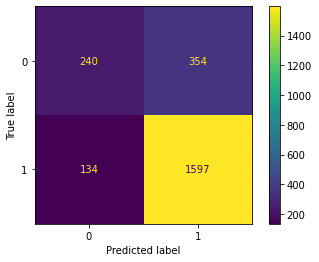

sensitivity : 0.9225880993645291, specificity : 0.40404040404040403, PPV : 0.8185545873910814, NPV : 0.6417112299465241


In [37]:
prediction_analyse(test_dataloader)